        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

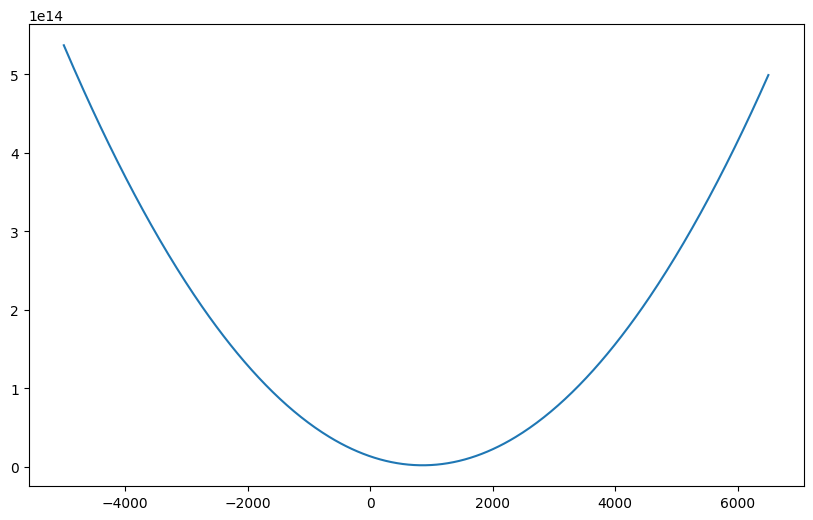

coefficient of determination: 0.22982140133356213
intercept: [2.18620556e+03 2.27579102e+00 6.23511020e-01]
slope: [[6.21880449e-04]
 [1.44616267e-07]
 [1.39031918e-07]]
[[1.04572155e+04 4.19918738e+00 2.47263553e+00]
 [9.80424106e+03 4.04734030e+00 2.32665202e+00]
 [9.80424106e+03 4.04734030e+00 2.32665202e+00]
 ...
 [3.27449635e+03 2.52886949e+00 8.66816878e-01]
 [3.27449635e+03 2.52886949e+00 8.66816878e-01]
 [3.27449635e+03 2.52886949e+00 8.66816878e-01]]
intercept: [2.18620556e+03 2.27579102e+00 6.23511020e-01]
slope: [[6.21880449e-04]
 [1.44616267e-07]
 [1.39031918e-07]]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

'''detect the best parameters w for a dataset predicting house price based on square footage, number of bathrooms, and number of bedrooms'''

df = pd.read_csv('Housing.csv')
print(df)
x = df[['price']]
y = df[['area', 'bedrooms', 'bathrooms']]
w_0 = x
w_1 = y
def h(w_0, w_1, x):
  return w_0 + w_1*x
m = df.shape[0]
def loss_function(df, w_0, w_1):
    m = df.shape[0]
    cost = 0 
    for x, y in zip(df.area, df.price):
      cost = cost + (h(w_0, w_1, x) - y)**2
    return cost/(2*m)
w_0 = 0
w_1 = np.linspace(-5000, 6500, 500)
plt.figure(figsize = (10, 6))
plt.plot(w_1, [loss_function(df, w_0, w) for w in w_1])
plt.show()
def grad_step(w_0, w_1, grad_w_0, grad_w_1, learning_rate = 0.001):
    w_0 = w_0 - learning_rate*grad_w_0
    w_1 = w_1 - learning_rate*grad_w_1
    return w_0, w_1
def grad_w_0(df, w_0, w_1):
    m = df.shape[0]
    cost = 0
    for x, y in zip(df.price, df.area):
        cost = cost + (h(w_0, w_1, x) - y)
    return cost/m
def grad_w_1(df, w_0, w_1):
    m = df.shape[0]
    cost = 0
    for x, y in zip(df.price, df.area):
        cost = cost + (h(w_0, w_1, x) - y)*x
    return cost/m
def grad_descent(w_0, w_1, df, num_iter, learning_rate = 0.001, epsilon = 0.0000001):
    loss = loss_function(df, w_0, w_1)
    loss_history = [loss]
    for i in range(num_iter):
        d_w_0 = grad_w_0(df, w_0, w_1)
        d_w_1 = grad_w_1(df, w_0, w_1)
        w_0, w_1 = grad_step(w_0, w_1, d_w_0, d_w_1, learning_rate = learning_rate)
        loss = loss_function(df, w_0, w_1)
        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break
        loss_history.append(loss)
    return w_0, w_1, loss_history

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_) 
print('slope:', model.coef_)  
print(model.predict(x))
def normalization(data):
    mean = np.mean(data)
    value_range = np.max(data) - np.min(data)
    result = []
    for x in data:
        norm_x = (x - mean)/value_range
        result.append(norm_x)
    return result
norm_df = pd.read_csv('Housing.csv')
x = np.array([norm_df.price]).T
y = np.array(norm_df.area)
reg = LinearRegression().fit(x, y)
reg.score(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_) 


